In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
file_path = "../data/interim/dataset_after_outliers.csv"

df = pd.read_csv(file_path)

# Show basic info and column names
df.info(), df.columns.tolist()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8768 entries, 0 to 8767
Data columns (total 44 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   host_response_time                                8768 non-null   object 
 1   host_identity_verified                            8768 non-null   int64  
 2   latitude                                          8768 non-null   float64
 3   longitude                                         8768 non-null   float64
 4   property_type                                     8768 non-null   object 
 5   room_type                                         8768 non-null   object 
 6   minimum_nights                                    8768 non-null   int64  
 7   maximum_nights                                    8768 non-null   int64  
 8   has_availability                                  8768 non-null   int64  
 9   availability_30    

(None,
 ['host_response_time',
  'host_identity_verified',
  'latitude',
  'longitude',
  'property_type',
  'room_type',
  'minimum_nights',
  'maximum_nights',
  'has_availability',
  'availability_30',
  'availability_365',
  'review_scores_rating',
  'review_scores_location',
  'review_scores_value',
  'instant_bookable',
  'log_price',
  'num_amenities',
  'amenity_wifi',
  'amenity_kitchen',
  'amenity_air_conditioning',
  'amenity_heating',
  'amenity_washer',
  'amenity_dryer',
  'amenity_tv',
  'amenity_parking',
  'amenity_pool',
  'amenity_pets_allowed',
  'amenity_long_term_stays_allowed',
  'num_host_verifications',
  'host_duration_days',
  'neighbourhood_group',
  'has_reviews',
  'calculated_host_listings_count_shared_rooms_log',
  'bathrooms_log',
  'calculated_host_listings_count_private_rooms_log',
  'host_acceptance_rate_log',
  'beds_log',
  'days_since_last_review_log',
  'number_of_reviews_log',
  'bedrooms_log',
  'reviews_per_month_log',
  'accommodates_log',
 

# Feature Visualization

In [3]:
# Set up the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='accommodates', y='log_price', data=df)
plt.title('Log Price vs. Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Log Price')
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `accommodates` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

As expected, listings that accommodate more guests generally have higher prices (higher log_price). However, we also see wider variability in price for listings with large capacity—indicating other factors (luxury, location, amenities) start to play a larger role.



In [4]:
# Boxplot for bathrooms vs. log_price
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='log_price', data=df)
plt.title('Log Price vs. Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Log Price')
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `bathrooms` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [5]:
df['bathrooms'].value_counts()

KeyError: 'bathrooms'

There's a clear upward trend: more bathrooms tend to align with higher prices. This makes sense, as more bathrooms typically indicate larger or more luxurious properties. There's also some price variance even for listings with 1–2 bathrooms, likely due to location or amenities. For the bathrooms more than 4 there is not enough of records to make any conclusions.


In [6]:
# Boxplot for bedrooms vs. log_price
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='log_price', data=df)
plt.title('Log Price vs. Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Log Price')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `bedrooms` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

Listings with more bedrooms generally have higher prices, but again we see increasing spread in prices for larger properties. Some 1-bedroom listings also have relatively high prices — likely premium or luxury stays. The spread and logic is similar to the previous number of bathrooms.

## See if higher number of rooms have also higher bathrooms and beds 

In [7]:
# Create a grouped summary to check average number of bathrooms and beds by number of bedrooms
grouped_bedrooms = df.groupby('bedrooms')[['bathrooms', 'beds']].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Average bathrooms by bedrooms
sns.lineplot(data=grouped_bedrooms, x='bedrooms', y='bathrooms', marker='o', ax=axes[0])
axes[0].set_title('Average Bathrooms by Bedrooms')
axes[0].set_xlabel('Bedrooms')
axes[0].set_ylabel('Average Bathrooms')

# Average beds by bedrooms
sns.lineplot(data=grouped_bedrooms, x='bedrooms', y='beds', marker='o', ax=axes[1])
axes[1].set_title('Average Beds by Bedrooms')
axes[1].set_xlabel('Bedrooms')
axes[1].set_ylabel('Average Beds')

plt.tight_layout()
plt.show()


KeyError: 'bedrooms'

More bedrooms generally mean more bathrooms and beds, as expected.
The increase in bathrooms is smooth but not 1-to-1 — many multi-bedroom listings still have fewer bathrooms than bedrooms.
️Beds scale well with bedrooms, often more than one bed per bedroom (e.g., bunk beds, sofa beds, etc.).
This validates the assumption that property size (bedrooms) scales with overall capacity and amenities.

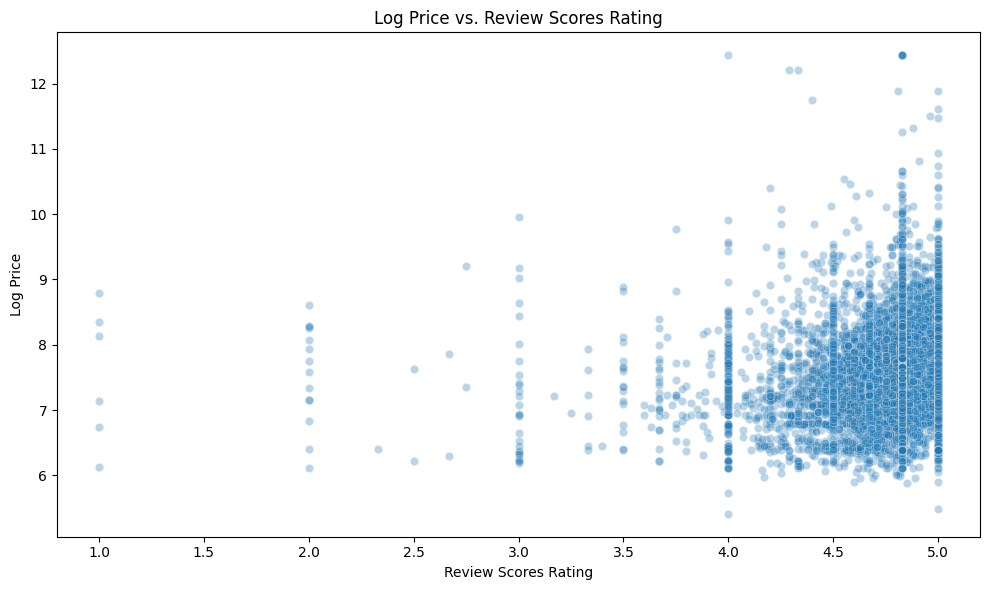

In [8]:
# Scatterplot for review_scores_rating vs. log_price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='review_scores_rating', y='log_price', alpha=0.3)
plt.title('Log Price vs. Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Log Price')
plt.tight_layout()
plt.show()


Most listings cluster around 4.5–5.0 ratings, which is typical in review systems.

There's no strong linear trend, but very low-rated listings (below ~4.0) tend to have lower prices, possibly due to lower demand.

Also full values (1.0,2.0,3.0,4.0,5.0) seems to be more clustered due to people being more likely to select them.

In [9]:
# Histogram of reviews_per_month
plt.figure(figsize=(10, 6))
sns.histplot(df['reviews_per_month'], bins=50, kde=True)
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


KeyError: 'reviews_per_month'

<Figure size 1000x600 with 0 Axes>

The distribution is heavily right-skewed — most listings receive less than 2 reviews per month.

A small number of listings are highly active, getting more than 4–5 reviews monthly — potentially indicating popular or frequently booked properties.

/tmp/ipykernel_5164/245480406.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_log_price = df.groupby('amenity_bin')['log_price'].mean()


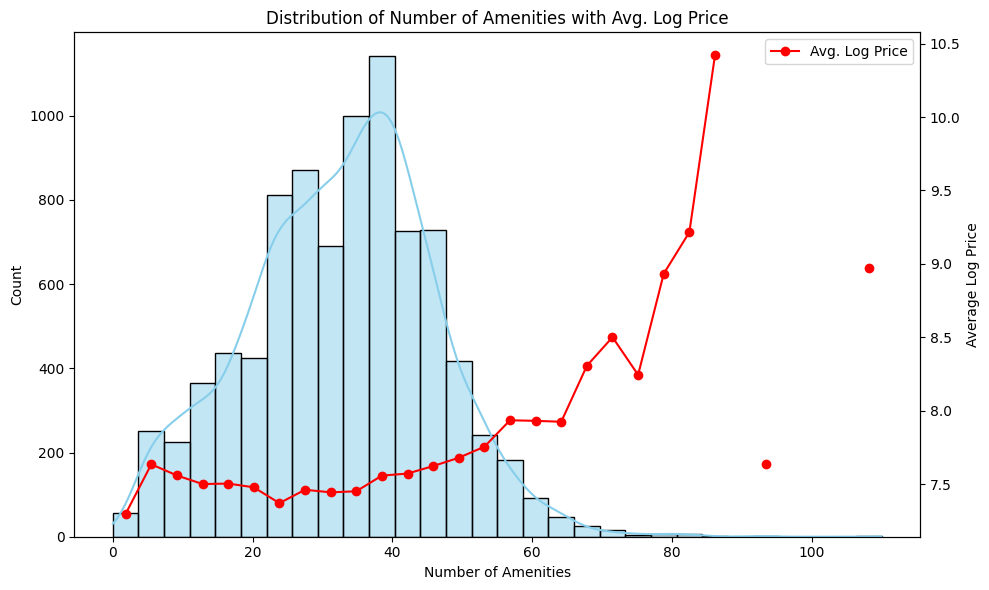

num_amenities
37     297
40     297
41     292
39     274
38     273
      ... 
83       1
110      1
84       1
92       1
93       1
Name: count, Length: 87, dtype: int64

In [10]:
# Prepare histogram of num_amenities with a secondary y-axis showing average log_price per bin
import numpy as np

# Create bins
bins = np.linspace(df['num_amenities'].min(), df['num_amenities'].max(), 31)
df['amenity_bin'] = pd.cut(df['num_amenities'], bins=bins)

# Calculate average log_price per bin
bin_centers = [interval.mid for interval in df['amenity_bin'].cat.categories]
avg_log_price = df.groupby('amenity_bin')['log_price'].mean()

# Plot histogram with KDE on primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.histplot(df['num_amenities'], bins=bins, kde=True, ax=ax1, color='skyblue')
ax1.set_xlabel('Number of Amenities')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Number of Amenities with Avg. Log Price')

# Plot average log_price on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(bin_centers, avg_log_price, color='red', marker='o', linestyle='-', label='Avg. Log Price')
ax2.set_ylabel('Average Log Price')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

df['num_amenities'].value_counts()


Listings with more amenities tend to charge more — but there's a limit; after a certain point, more amenities may not raise price significantly.
In higher amounts of amenities there are not enough of records to make decisions.

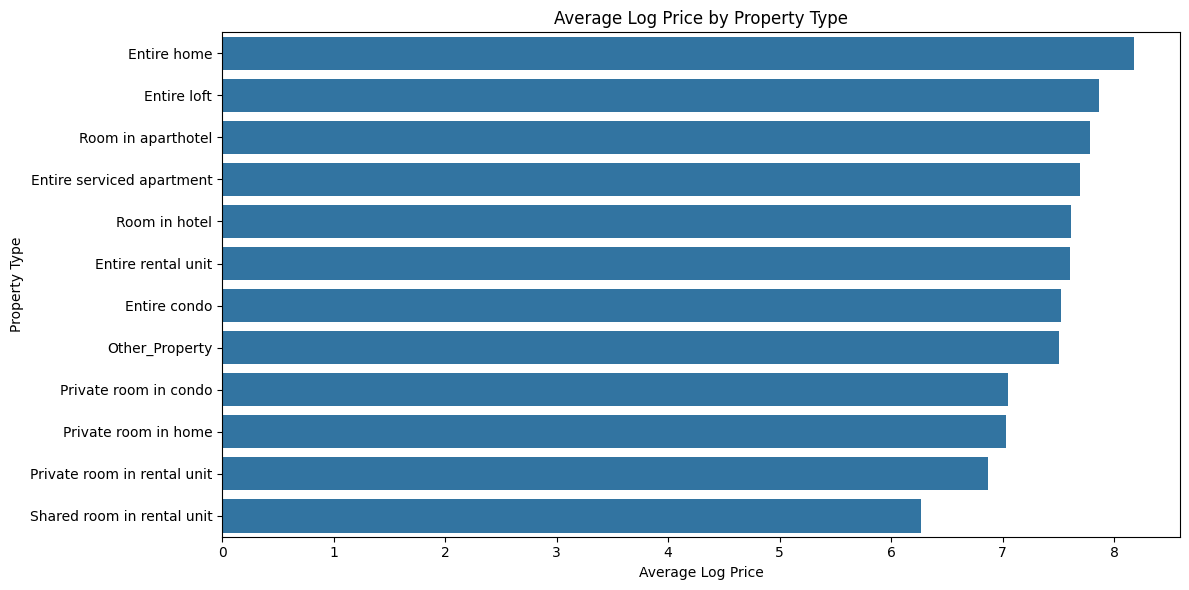

In [11]:
# Bar plot for average log price by property type
plt.figure(figsize=(12, 6))
avg_price_prop = df.groupby('property_type')['log_price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_prop.values, y=avg_price_prop.index)
plt.title('Average Log Price by Property Type')
plt.xlabel('Average Log Price')
plt.ylabel('Property Type')
plt.tight_layout()
plt.show()


As expected, luxury or larger properties like Lofts, Villas, and Entire guesthouses have higher average prices.
Apartments and Houses dominate the listing count and show moderate average pricing.
Simpler spaces like Hostels or Shared Rooms fall toward the lower end.